# Plotting weather Data

The data used here comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe. The data used in this notebook comes from the area around **Ann Arbor, Michigan, United States**. 

One dataset contains the following information in the columns (each row refers to a single observation):

* **id** : station identification code
* **date** : date in YYYY-MM-DD format 
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)


A second dataset contains amongst other information the latitude and longitude for every station in Ann Arbor, Michigan.

**Plots**:
- Map of the different weather stations in Ann Arbor, Michigan.
- Plot comparing the weather in 2015 to the years before (2005 -2014) by plotting the minimum and maximum temperatures. 
- Plot that checks, if a specific value - as an input provided by the user - lies within the range of the temperature of each year.  


### Importing libraries, loading the datasets

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from geopy.geocoders import Nominatim
%matplotlib inline
import pandas as pd
import folium 
import numpy as np

In [2]:
df_lat_lon = pd.read_csv('BinSize_d400.csv')
df_lat_lon.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...


In [3]:
df_weather = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df_weather.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
Ann_Arbor_ID=list(df_weather["ID"].unique())
cols = ["ID", "LATITUDE", "LONGITUDE"]
df_lat_lon_filt= df_lat_lon[df_lat_lon["ID"].isin(Ann_Arbor_ID)]
df_lat_lon_filt.head()
df_lat_lon_filt = df_lat_lon_filt.loc[:,cols]

## 1. Plotting the weather stations on a map of Ann Arbor, Michigan

In [5]:
#getting a map of Ann Arbor, Michigan
address = 'Ann Arbor, Michigan'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
weather_map = folium.Map(location=[latitude, longitude], zoom_start=10)

#plotting the weather stations on the map
lons = df_lat_lon_filt['LONGITUDE'].tolist()
lats = df_lat_lon_filt['LATITUDE'].tolist()

for i in zip(lats, lons):
    folium.vector_layers.CircleMarker(i, radius=5, color='blue', fill = True, fill_color='blue',fill_opacity=0.6
    ).add_to(weather_map)

weather_map

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


## 2. Plotting the extreme weather in 2015 compared to the years before

In [6]:
#further preparation of df_weather
df_weather.sort_values(["Date"], ascending=False, inplace = True)
df_weather["Data_Value"] = df_weather["Data_Value"]*0.1
# type-conversions
df_weather["Date"] = pd.to_datetime(df_weather["Date"])
df_weather["Element"] = df_weather["Element"].astype('str')
df_weather["Data_Value"] = df_weather["Data_Value"].astype('int64')
#drop 29th of feburary
df_weather = df_weather[df_weather.Date != '2008-02-29']
df_weather  = df_weather[df_weather.Date != '2012-02-29']
df_weather.set_index("Date", inplace = True)
df_weather.head()

,ID,Element,Data_Value
Date,,,
2015-12-31,USC00205563,TMAX,0
2015-12-31,USC00208972,TMIN,-2
2015-12-31,USC00200228,TMAX,0
2015-12-31,USC00207312,TMIN,-1
2015-12-31,USW00014833,TMIN,-2


In [7]:
#get dataset of 2005 -2014
dfn= df_weather.loc["2014-12":"2005-01", :]
#group by month and day and get the minimum and maximum temperatures for each day
group=dfn.groupby([(dfn.index.month),(dfn.index.day)]).aggregate({'Data_Value': ['min', 'max']})
group.columns = group.columns.droplevel()

In [8]:
#get dataset of 2015
df15= df_weather.loc["2015-12-31":"2014-12-31", :]
#group by month and day and get the minimum and maximum temperatures for each day
group15=df15.groupby([(df15.index.month),(df15.index.day)]).aggregate({'Data_Value': ['min', 'max']})
group15.columns = group15.columns.droplevel()

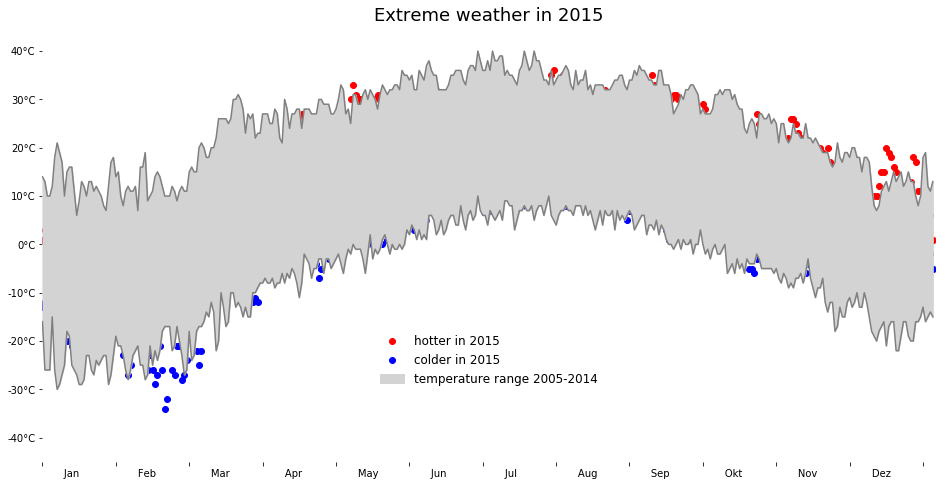

In [9]:
#plot it
plt.figure(figsize=(16,8))
plt.box(on=None)
mini = [x[0] for x in group[["min"]].values]
maxi = [x[0] for x in group[["max"]].values]
days = np.asarray(range(365))
mini15 = [x[0] for x in group15[["min"]].values]
maxi15 = [x[0] for x in group15[["max"]].values]
plt.plot(days, mini, color="grey", zorder = 2)
plt.plot(days, maxi, color="grey", zorder =2)
plt.plot(days, maxi15, "ro", zorder =1, label ="hotter in 2015")
plt.plot(days, mini15, "bo", zorder =1, label = "colder in 2015")
plt.fill_between(days, mini, maxi, color='lightgrey', zorder=2, label = "temperature range 2005-2014")
ax = plt.gca()
ax.set_xlim(0, 365)
ax.set_ylim(-45,45)
plt.title('Extreme weather in 2015', fontsize='18')
new_xtick =["       Jan", "       Feb", "       Mar", "       Apr", "       May", "       Jun", "       Jul", "       Aug", "       Sep", "       Okt", "       Nov", "       Dez"]
plt.xticks(np.arange(0,366,30), new_xtick, horizontalalignment='left')
new_ytick= ["{}°C".format(i) for i in np.arange(-40,50,10)]
plt.yticks(np.arange(-40,50,10), new_ytick)
plt.legend(frameon=False, fontsize='12', loc ="lower center", bbox_to_anchor=(0.5, 0.15)) 


## 3. Plotting if a temperature input by a user is within each year's temperature range

In [10]:
#get min and may tempoerature for every year
all_years = df_weather.groupby(df_weather.index.year).aggregate({'Data_Value': ['min', 'max']})
all_years.columns = all_years.columns.droplevel()
all_years.head()

,min,max
Date,,
2005,-30,38
2006,-18,36
2007,-25,36
2008,-24,36
2009,-29,36


enter a temperature40


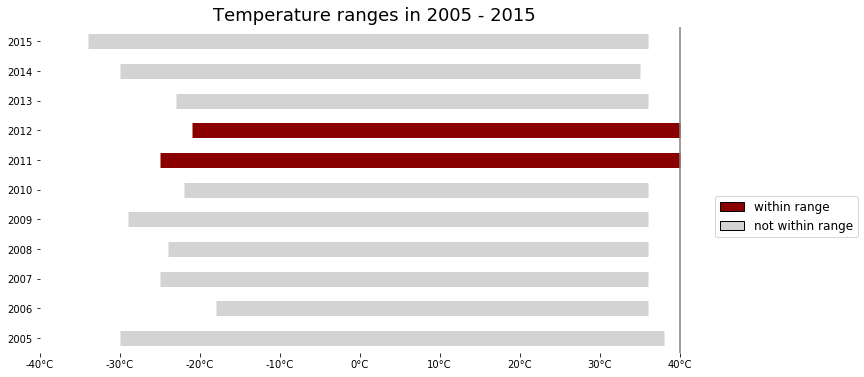

In [11]:
#creating an interactive Line-Plot

def getColor(min, max):
    if x <= max and x >= min:
        return 'darkred'
    else:
        return 'lightgrey'
    
x= input("enter a temperature")
try: 
    x = float(x)
except:
    x= input("format is not valid - please input a number, use dot instead of comma for float numbers")
    x = float(x)
lines = []
plt.figure(figsize=(12,6))
for i,row in all_years.iterrows():
    line = plt.plot([row["min"], row["max"]], [int(i), int(i)], lw=15, color = getColor(row["min"], row["max"]), solid_capstyle="butt")
    lines.append(line)
plt.xticks(range(-40,45,5))
plt.yticks(np.arange(2005,2016,1))
plt.xticks(np.arange(-40,50,10), ["{}°C".format(i) for i in np.arange(-40,50,10)])
plt.title('Temperature ranges in 2005 - 2015', fontsize='18')

ax = plt.gca()
ax.axvline(x=x, color ="grey")
plt.box(on=None)
import matplotlib.patches as mpatches
red = mpatches.Patch(facecolor='darkred', edgecolor = "black", label='within range')
grey = mpatches.Patch(facecolor='lightgrey', edgecolor = "black", label='not within range')
plt.legend(handles=[red, grey], fontsize='12', bbox_to_anchor=(1, 0.5))

plt.show()